In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Let's take a first look of the dataset

df = pd.read_csv('sloth_data.csv')
df

,Unnamed: 0,claw_length_cm,endangered,size_cm,specie,sub_specie,tail_length_cm,weight_kg
0,0,6.825,critically_endangered,52.004,three_toed,Pygmy three-toed sloth,4.448,3.570
1,1,8.260,critically_endangered,50.082,three_toed,Pygmy three-toed sloth,6.286,2.844
2,2,8.662,critically_endangered,51.498,three_toed,Pygmy three-toed sloth,4.551,1.259
3,3,8.467,critically_endangered,50.122,three_toed,Pygmy three-toed sloth,6.983,2.392
4,4,7.104,critically_endangered,51.364,three_toed,Pygmy three-toed sloth,5.411,3.163
...,...,...,...,...,...,...,...,...
4995,4995,3.919,least_concern,62.819,two_toed,Hoffman’s two-toed sloth,3.176,4.247
4996,4996,5.881,least_concern,63.150,two_toed,Hoffman’s two-toed sloth,1.535,4.056
4997,4997,4.941,least_concern,62.091,two_toed,Hoffman’s two-toed sloth,1.905,5.194
4998,4998,6.176,least_concern,62.039,two_toed,Hoffman’s two-toed sloth,1.164,5.035


In [3]:
# Drop the Unnamed: 0 column (same that index)

df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.dtypes.value_counts()

float64    4
object     3
Name: count, dtype: int64

In [5]:
# Looking for NaN values 

df.isnull().any()

claw_length_cm    False
endangered        False
size_cm           False
specie            False
sub_specie        False
tail_length_cm    False
weight_kg         False
dtype: bool

In [6]:
# Some statistics values

df.describe(include='all')

,claw_length_cm,endangered,size_cm,specie,sub_specie,tail_length_cm,weight_kg
count,5000.000000,5000,5000.000000,5000,5000,5000.000000,5000.000000
unique,NaN,3,NaN,2,6,NaN,NaN
top,NaN,least_concern,NaN,three_toed,Hoffman’s two-toed sloth,NaN,NaN
freq,NaN,4390,NaN,2662,1198,NaN,NaN
mean,7.423503,NaN,60.399852,NaN,NaN,3.410544,5.253253
std,1.520533,NaN,5.929968,NaN,NaN,2.333288,1.268203
min,1.748000,NaN,46.928000,NaN,NaN,-2.942000,0.946000
25%,6.383750,NaN,59.904750,NaN,NaN,1.440250,4.382500
50%,7.445000,NaN,62.478500,NaN,NaN,3.812000,5.274000
75%,8.491500,NaN,64.398250,NaN,NaN,5.351250,6.125250


In [7]:
# Celd above shows that the min value on the tail_length_cm is a negative value, which does not make any sense. So, let's look a bit more 
df[df['tail_length_cm']<=0.2]

,claw_length_cm,endangered,size_cm,specie,sub_specie,tail_length_cm,weight_kg
2663,9.203,least_concern,67.519,two_toed,Linnaeus’s two-toed sloth,-1.006,6.349
2664,9.574,least_concern,65.167,two_toed,Linnaeus’s two-toed sloth,-0.030,6.125
2667,7.748,least_concern,64.756,two_toed,Linnaeus’s two-toed sloth,-1.163,6.004
2669,7.470,least_concern,63.149,two_toed,Linnaeus’s two-toed sloth,-0.453,5.917
2671,7.024,least_concern,65.752,two_toed,Linnaeus’s two-toed sloth,0.135,5.131
...,...,...,...,...,...,...,...
4717,4.840,least_concern,63.832,two_toed,Hoffman’s two-toed sloth,0.093,6.213
4850,5.741,least_concern,64.177,two_toed,Hoffman’s two-toed sloth,0.118,6.055
4853,3.769,least_concern,62.904,two_toed,Hoffman’s two-toed sloth,-0.257,6.218
4939,5.447,least_concern,64.348,two_toed,Hoffman’s two-toed sloth,0.069,6.878


In [8]:
indextoDrop = df[df['tail_length_cm']<=0.2].index
df = df.drop(indextoDrop,axis=0)
df = df.reset_index()
df = df.drop('index',axis=1)
df

,claw_length_cm,endangered,size_cm,specie,sub_specie,tail_length_cm,weight_kg
0,6.825,critically_endangered,52.004,three_toed,Pygmy three-toed sloth,4.448,3.570
1,8.260,critically_endangered,50.082,three_toed,Pygmy three-toed sloth,6.286,2.844
2,8.662,critically_endangered,51.498,three_toed,Pygmy three-toed sloth,4.551,1.259
3,8.467,critically_endangered,50.122,three_toed,Pygmy three-toed sloth,6.983,2.392
4,7.104,critically_endangered,51.364,three_toed,Pygmy three-toed sloth,5.411,3.163
...,...,...,...,...,...,...,...
4460,3.919,least_concern,62.819,two_toed,Hoffman’s two-toed sloth,3.176,4.247
4461,5.881,least_concern,63.150,two_toed,Hoffman’s two-toed sloth,1.535,4.056
4462,4.941,least_concern,62.091,two_toed,Hoffman’s two-toed sloth,1.905,5.194
4463,6.176,least_concern,62.039,two_toed,Hoffman’s two-toed sloth,1.164,5.035


In [9]:
df.describe(include='all')

,claw_length_cm,endangered,size_cm,specie,sub_specie,tail_length_cm,weight_kg
count,4465.000000,4465,4465.000000,4465,4465,4465.000000,4465.000000
unique,NaN,3,NaN,2,6,NaN,NaN
top,NaN,least_concern,NaN,three_toed,Hoffman’s two-toed sloth,NaN,NaN
freq,NaN,3855,NaN,2662,1177,NaN,NaN
mean,7.255005,NaN,59.749583,NaN,NaN,3.886917,5.131131
std,1.460137,NaN,5.939666,NaN,NaN,1.982405,1.242377
min,1.748000,NaN,46.928000,NaN,NaN,0.201000,0.946000
25%,6.270000,NaN,52.568000,NaN,NaN,2.124000,4.276000
50%,7.262000,NaN,62.031000,NaN,NaN,4.249000,5.129000
75%,8.251000,NaN,63.712000,NaN,NaN,5.479000,5.981000


In [10]:
df.describe(include='object')

,endangered,specie,sub_specie
count,4465,4465,4465
unique,3,2,6
top,least_concern,three_toed,Hoffman’s two-toed sloth
freq,3855,2662,1177


In [11]:
def convertcolumnsOtoC(columns_toConvert,df):
    dict_objectcolumns = {}
    
    for i in range(0, len(columns_toConvert),1):
        dict_objectcolumns[columns_toConvert[i]] = 'category'

    df_changed = df.astype(
        dict_objectcolumns
    )
    return df_changed

df = convertcolumnsOtoC(df.describe(include='object').columns,df)
df.dtypes

claw_length_cm     float64
endangered        category
size_cm            float64
specie            category
sub_specie        category
tail_length_cm     float64
weight_kg          float64
dtype: object

In [12]:
numbercol_names = df.describe(include = np.number).columns
categorycol_names = df.describe(include = 'category').columns
df

,claw_length_cm,endangered,size_cm,specie,sub_specie,tail_length_cm,weight_kg
0,6.825,critically_endangered,52.004,three_toed,Pygmy three-toed sloth,4.448,3.570
1,8.260,critically_endangered,50.082,three_toed,Pygmy three-toed sloth,6.286,2.844
2,8.662,critically_endangered,51.498,three_toed,Pygmy three-toed sloth,4.551,1.259
3,8.467,critically_endangered,50.122,three_toed,Pygmy three-toed sloth,6.983,2.392
4,7.104,critically_endangered,51.364,three_toed,Pygmy three-toed sloth,5.411,3.163
...,...,...,...,...,...,...,...
4460,3.919,least_concern,62.819,two_toed,Hoffman’s two-toed sloth,3.176,4.247
4461,5.881,least_concern,63.150,two_toed,Hoffman’s two-toed sloth,1.535,4.056
4462,4.941,least_concern,62.091,two_toed,Hoffman’s two-toed sloth,1.905,5.194
4463,6.176,least_concern,62.039,two_toed,Hoffman’s two-toed sloth,1.164,5.035


<Axes: xlabel='endangered', ylabel='count'>

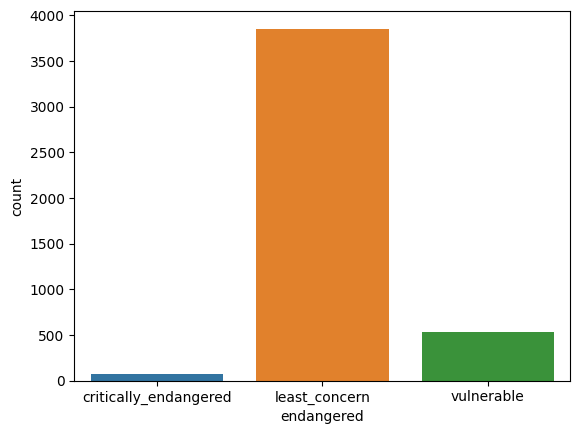

In [13]:
df.value_counts('endangered',sort=True).reset_index(name='count').pipe(lambda df: (sns.barplot(data= df, x= 'endangered',y='count')))

<Axes: xlabel='specie', ylabel='count'>

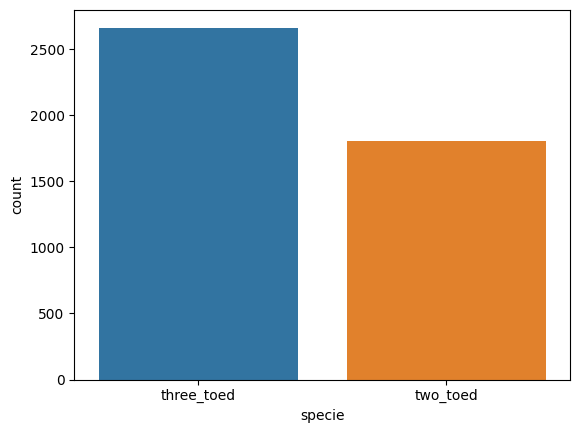

In [14]:
df.value_counts('specie',sort=True).reset_index(name='count').pipe(lambda df: (sns.barplot(data= df, x= 'specie',y='count')))

<Axes: xlabel='sub_specie', ylabel='count'>

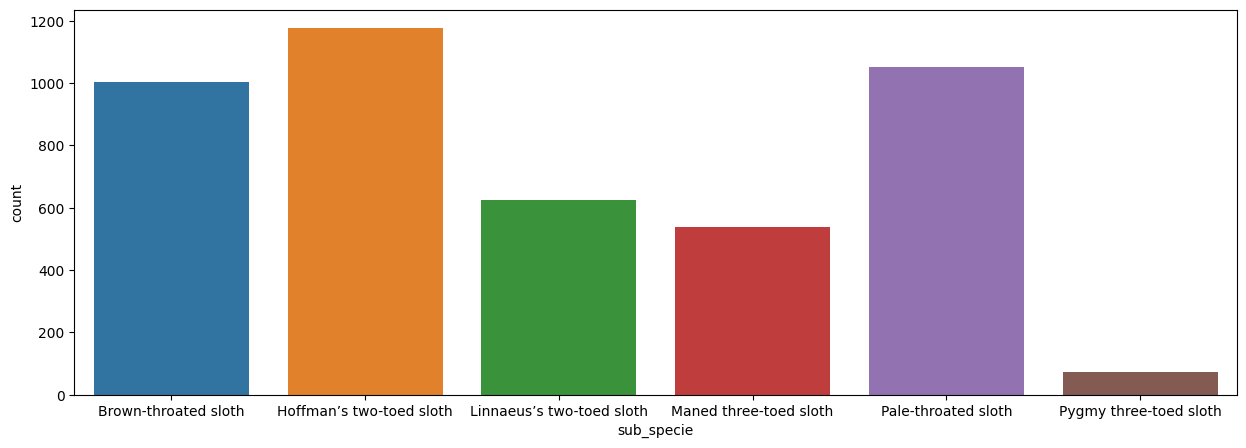

In [15]:
fig = plt.subplots(1,figsize=(15,5))

df.value_counts('sub_specie',sort=False).reset_index(name='count').pipe(lambda df: (sns.barplot(data= df, x= 'sub_specie',y='count')))

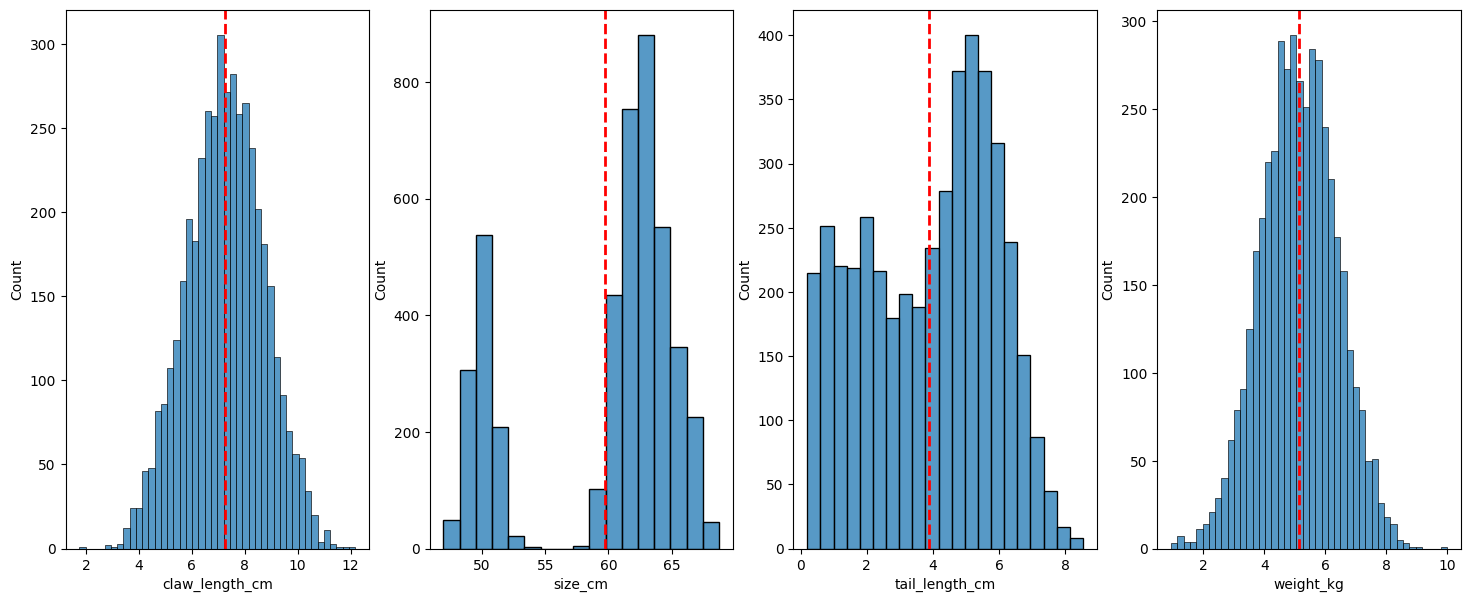

In [16]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (18,7))

i = 0
for names in numbercol_names:
    sns.histplot(data=df, x=names, ax=axs[i])
    axs[i].axvline(x=df[names].mean(), color='red', linestyle='dashed', linewidth=2)
    i+=1


In [17]:
#df[(df['size_cm'] >= 54) & (58 >= df['size_cm'])]
#df = df[df['size_cm']<=54]
#df = df[df['size_cm']>=58]

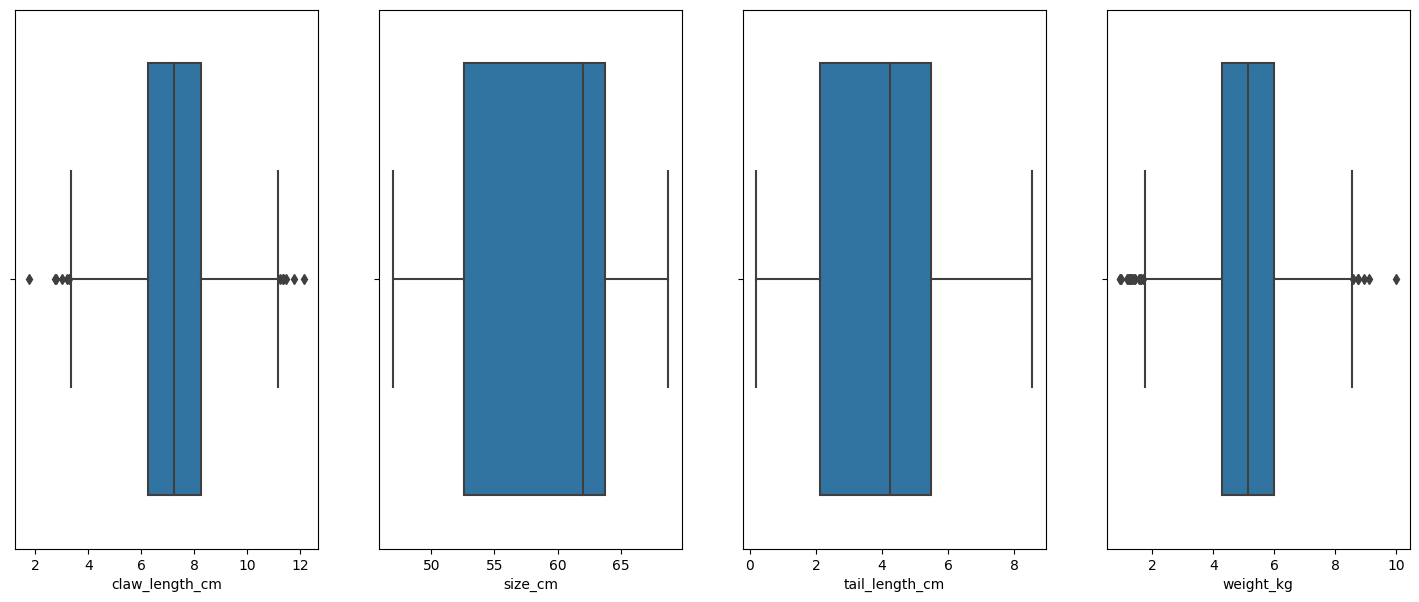

In [18]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (18,7))

i = 0
for names in numbercol_names:
    sns.boxplot(data=df, x=names, ax=axs[i])
    i+=1


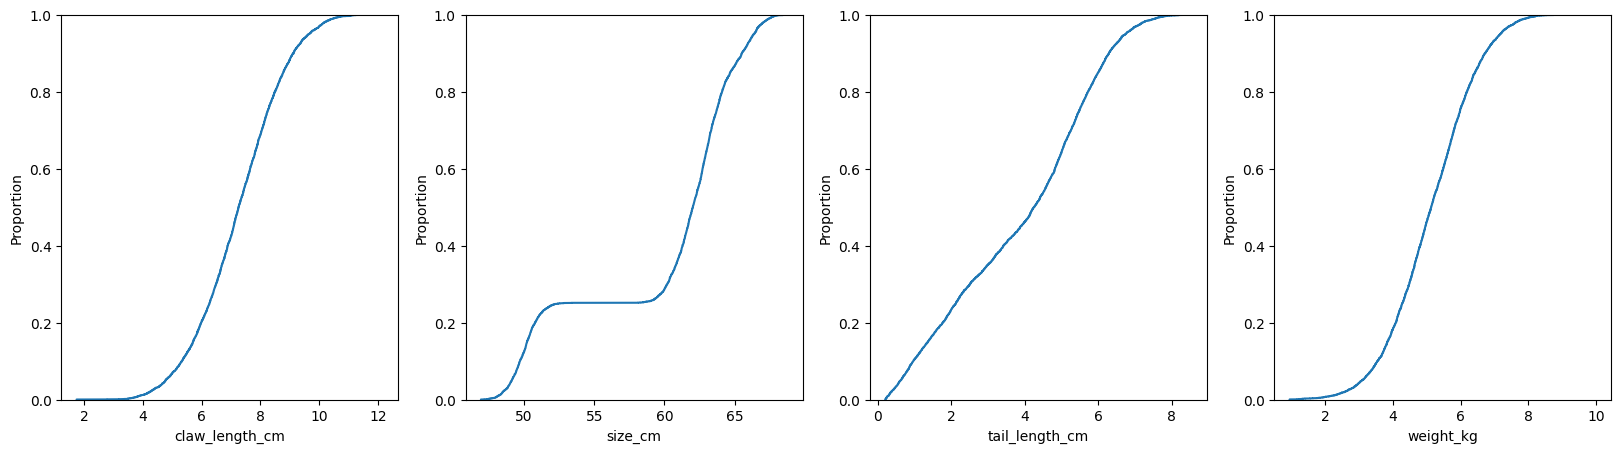

In [38]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,5))

i = 0
for names in numbercol_names:
    sns.ecdfplot(data=df, x=names, ax=axs[i])
    i+=1


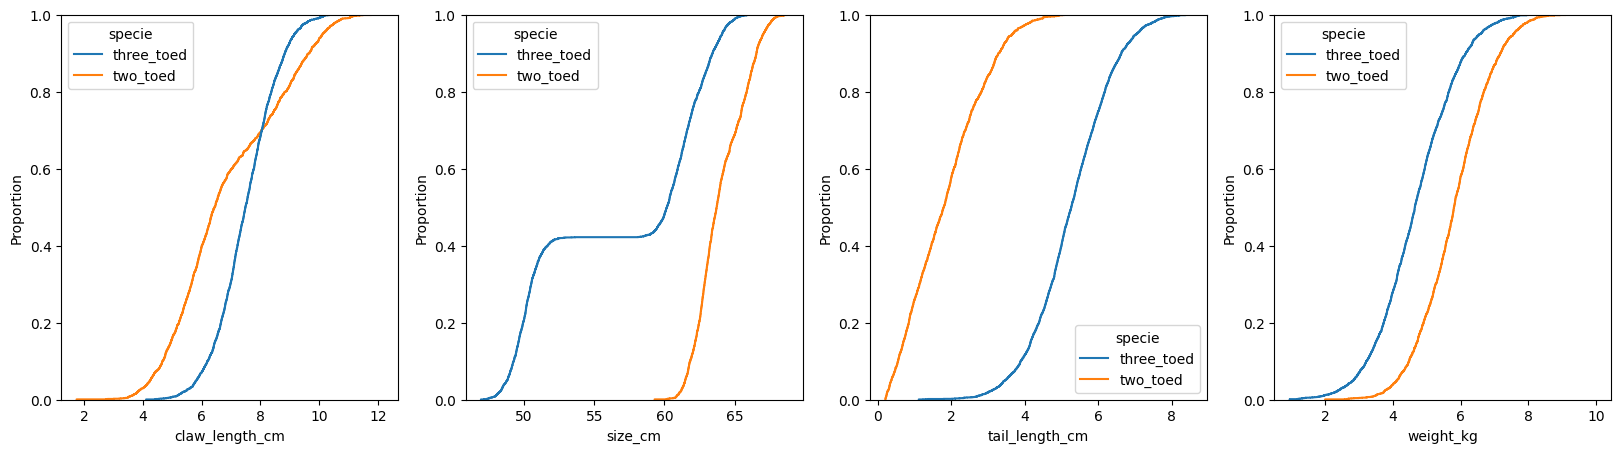

In [20]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,5))

i = 0
for names in numbercol_names:
    sns.ecdfplot(data=df, x=names, ax=axs[i], hue='specie')
    i+=1


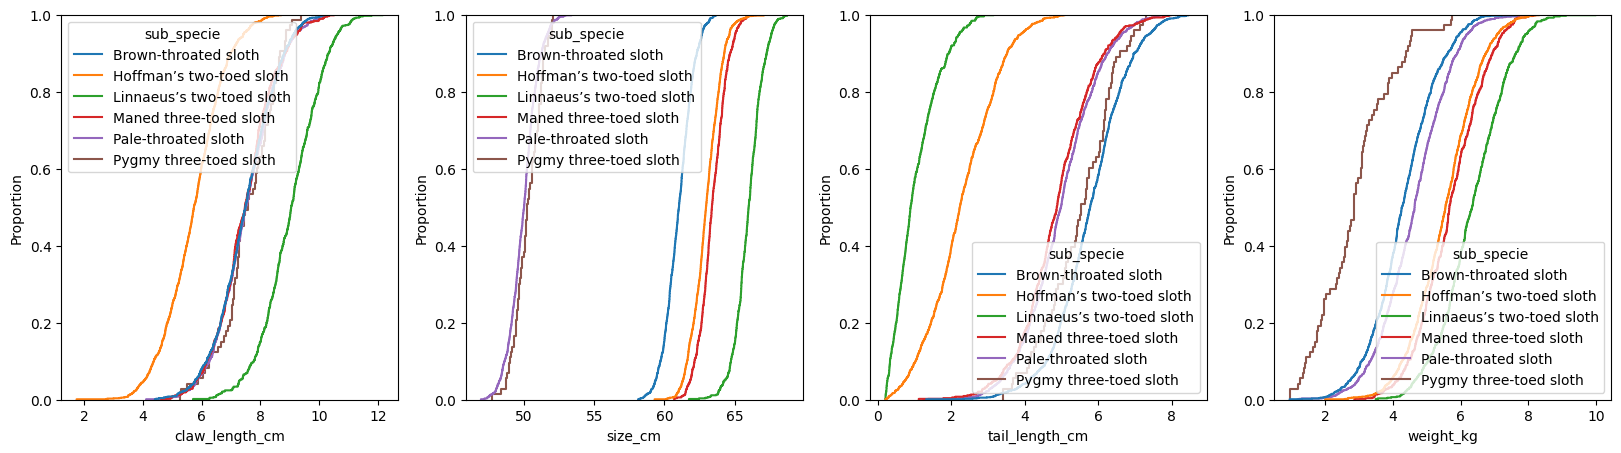

In [21]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,5))

i = 0
for names in numbercol_names:
    sns.ecdfplot(data=df, x=names, ax=axs[i], hue='sub_specie')
    i+=1


c:\Users\Janus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


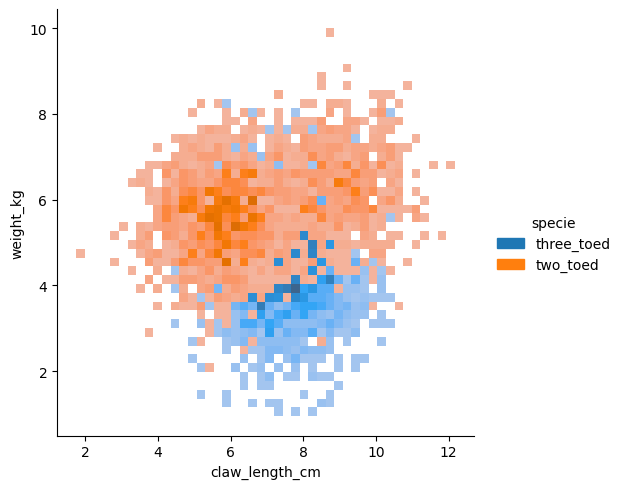

In [22]:
sns.displot(data= df, x= 'claw_length_cm', y='weight_kg', hue = 'specie')

<Axes: xlabel='claw_length_cm', ylabel='weight_kg'>

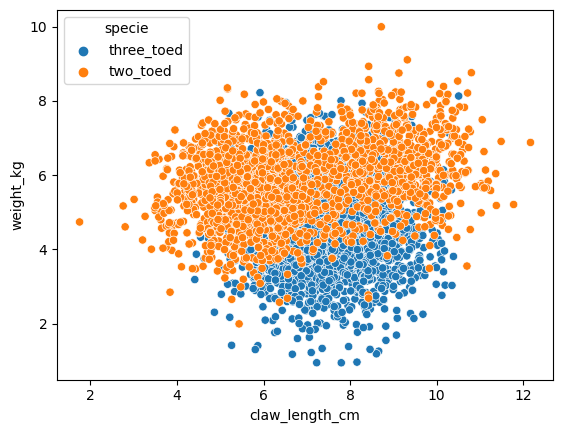

In [23]:
sns.scatterplot(data= df, x= 'claw_length_cm', y='weight_kg', hue = 'specie')

c:\Users\Janus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


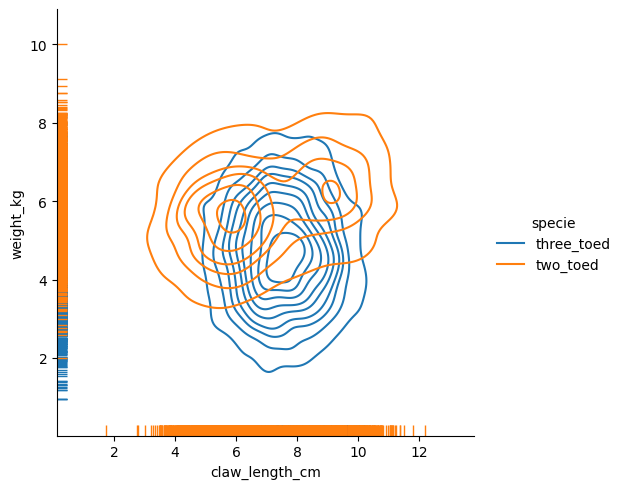

In [24]:
sns.displot(data= df, x= 'claw_length_cm', y='weight_kg', rug=True, hue = 'specie', kind='kde')

<Axes: xlabel='claw_length_cm', ylabel='weight_kg'>

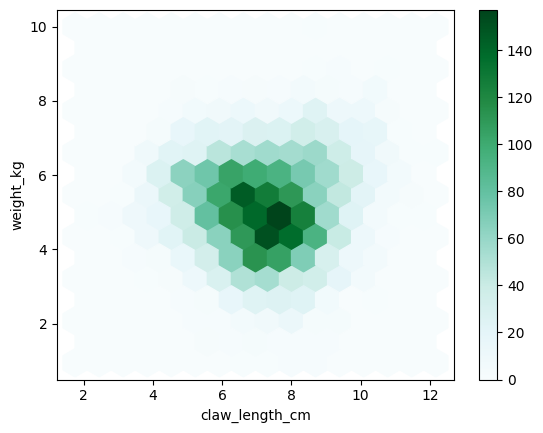

In [25]:
df.plot.hexbin(x= 'claw_length_cm', y= 'weight_kg',gridsize=15)

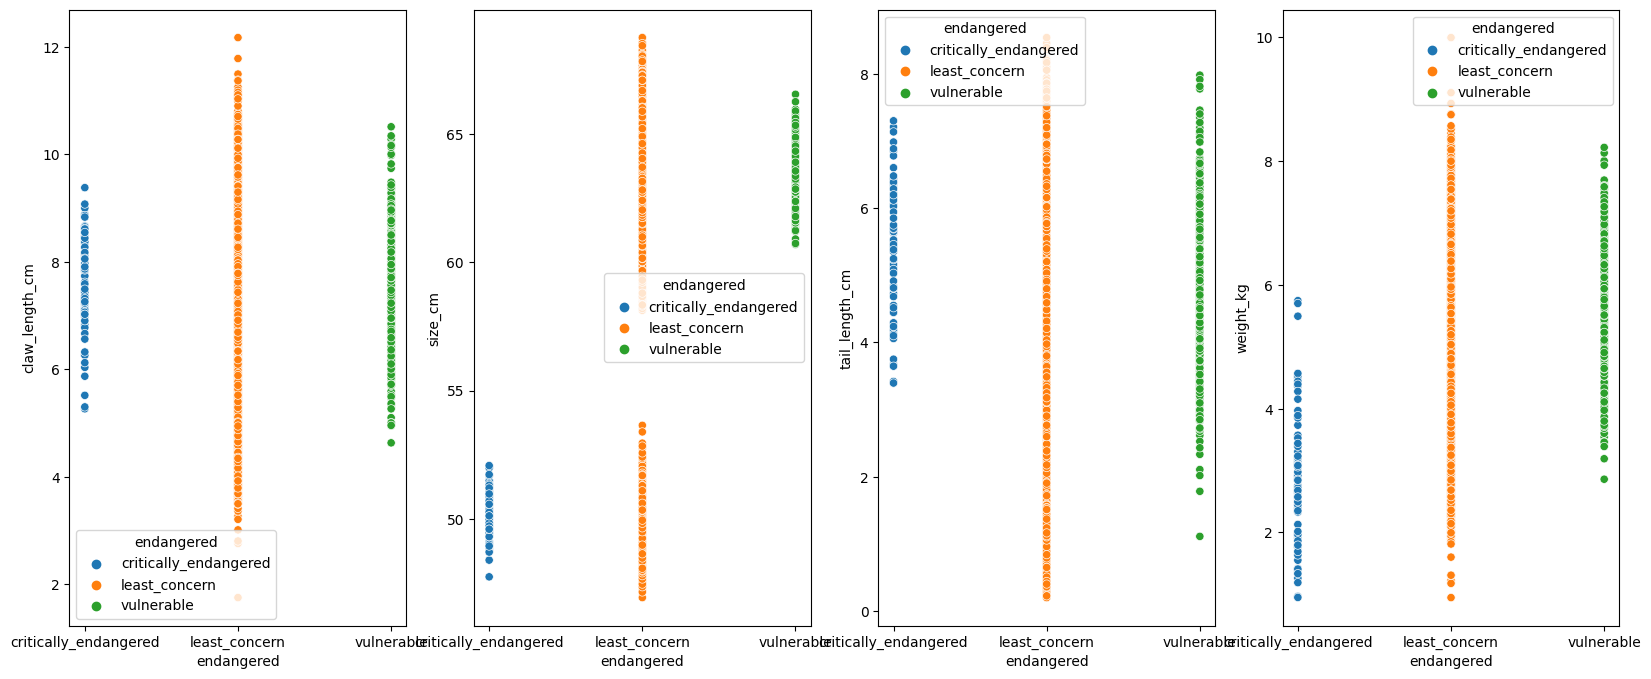

In [26]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,8))

i = 0
for names in numbercol_names:
    sns.scatterplot(data=df, x='endangered', y=names, ax=axs[i], hue='endangered')
    i+=1


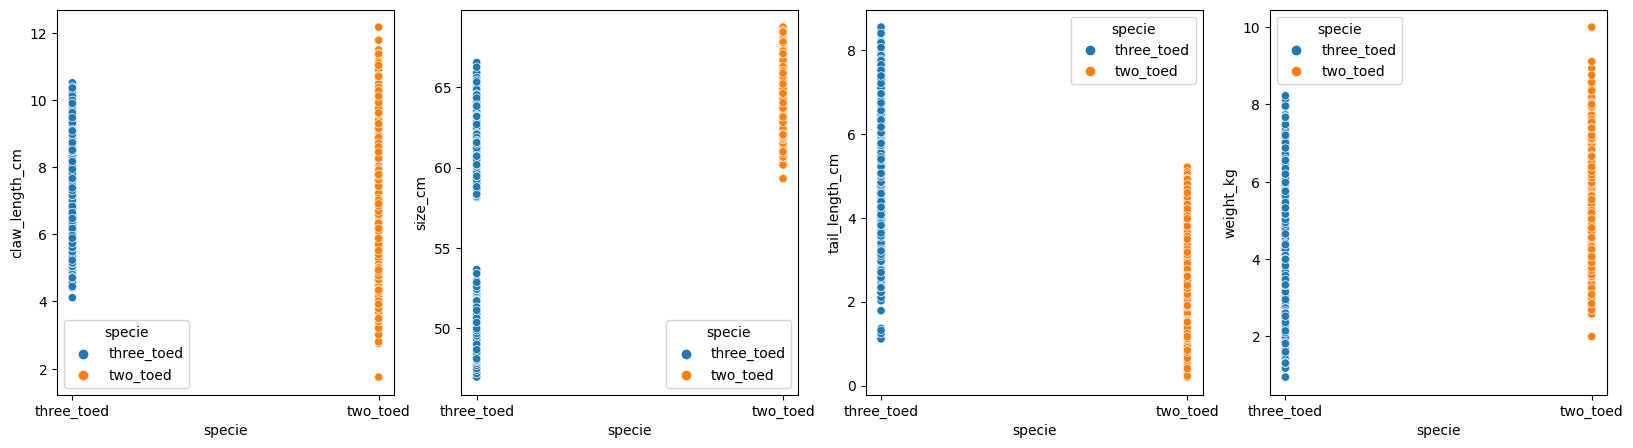

In [27]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,5))

i = 0
for names in numbercol_names:
    sns.scatterplot(data=df, x='specie', y=names, ax=axs[i], hue='specie')
    i+=1


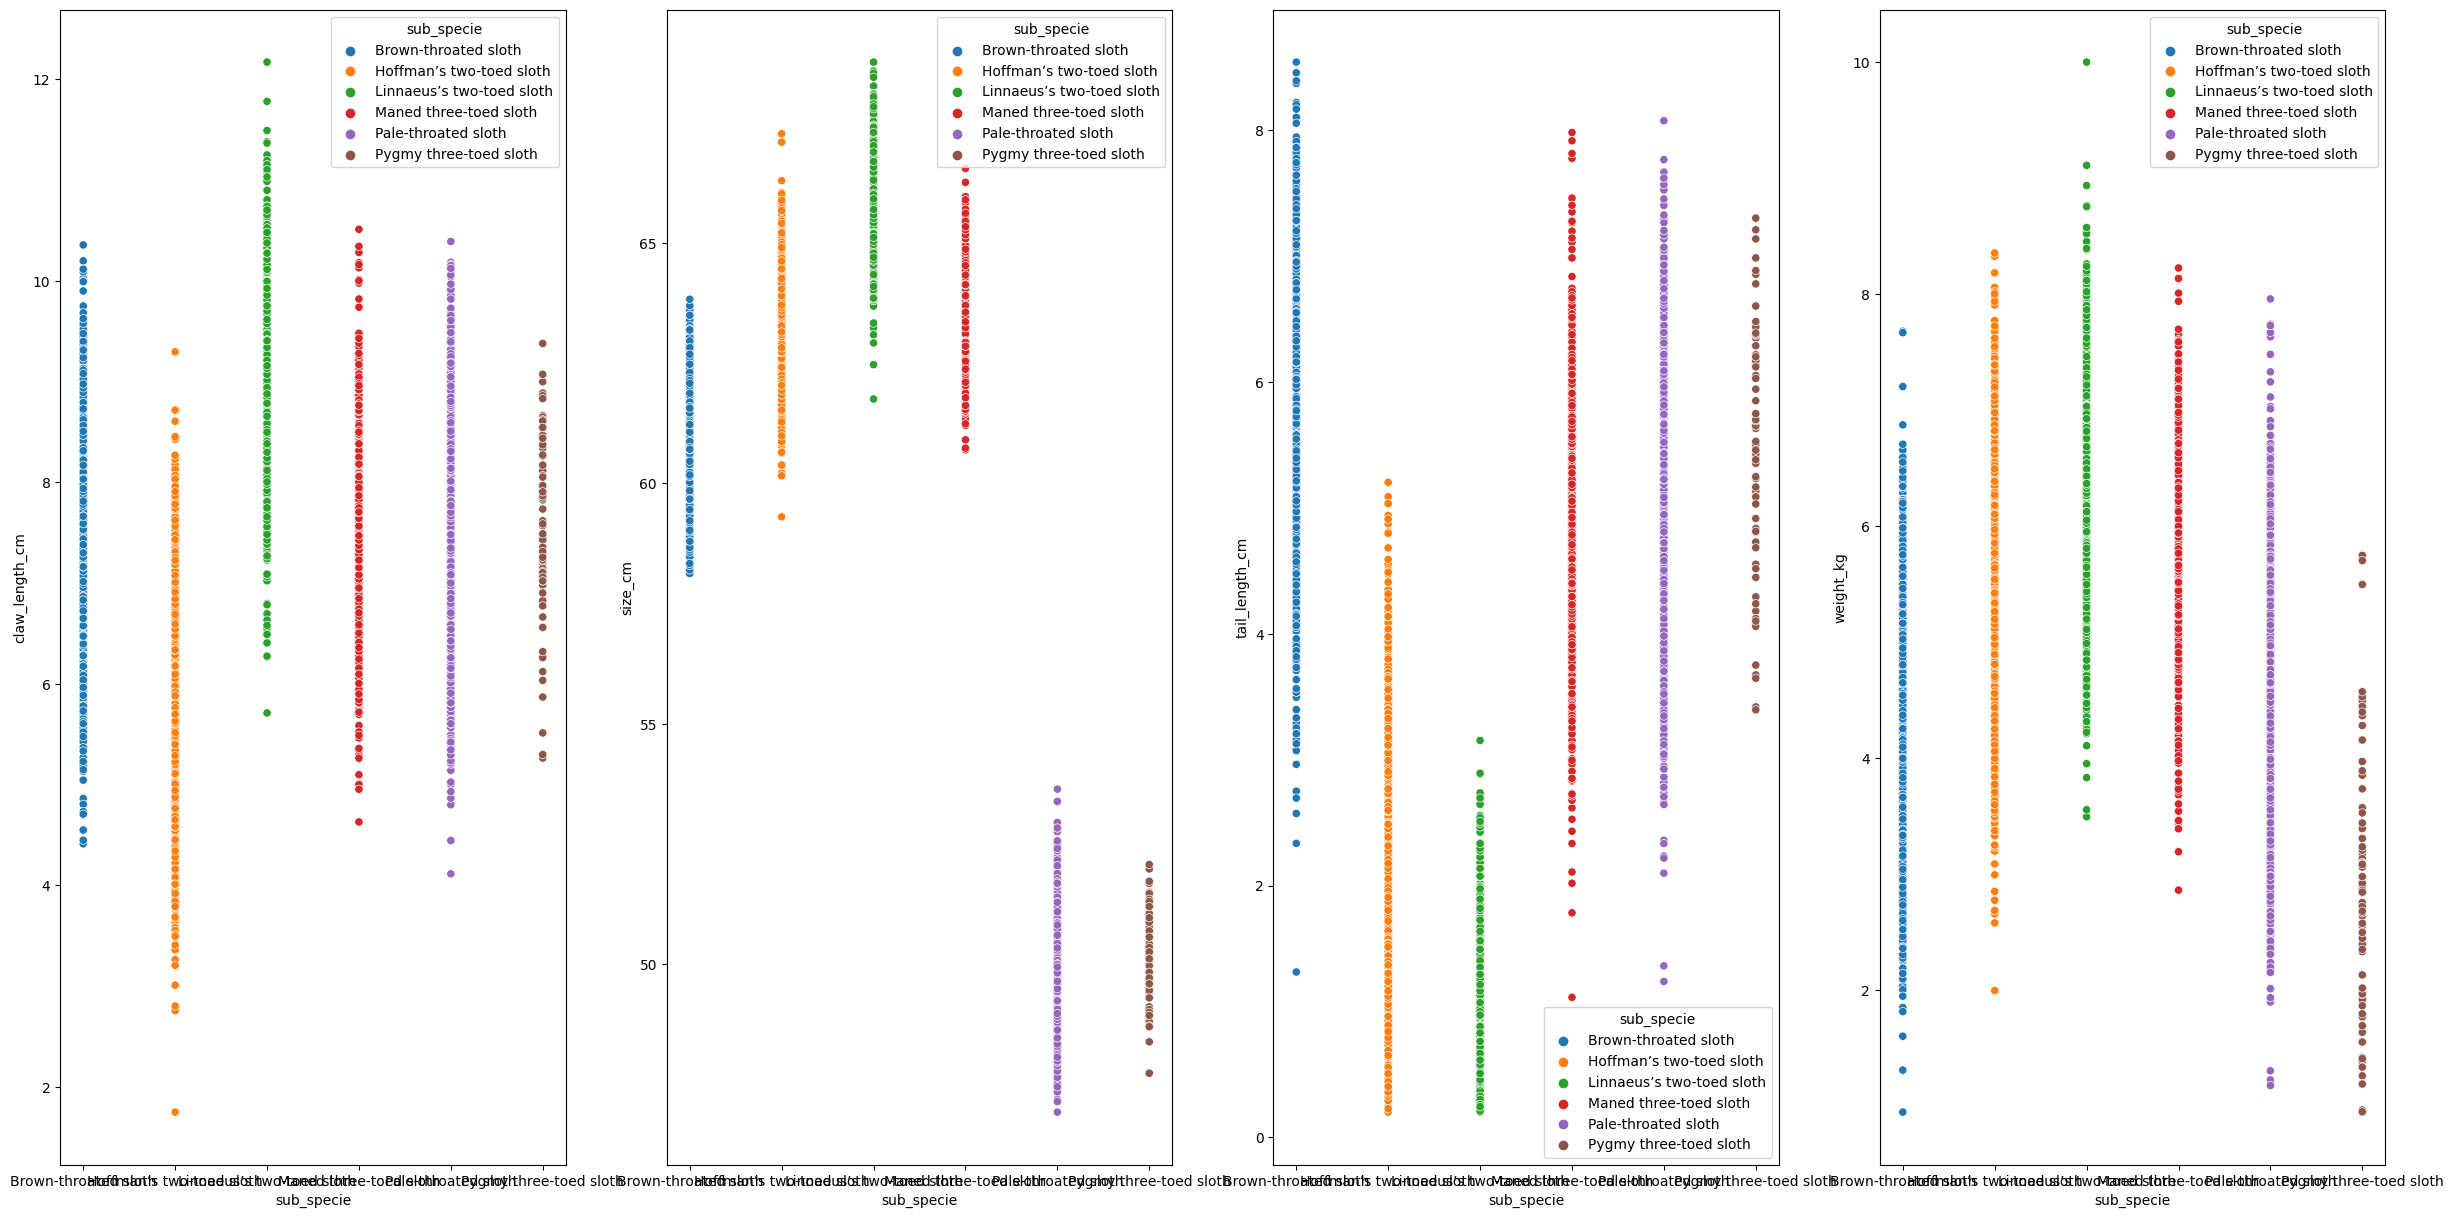

In [28]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (30,15))

i = 0
for names in numbercol_names:
    sns.scatterplot(data=df, x='sub_specie', y=names, ax=axs[i], hue='sub_specie')
    i+=1


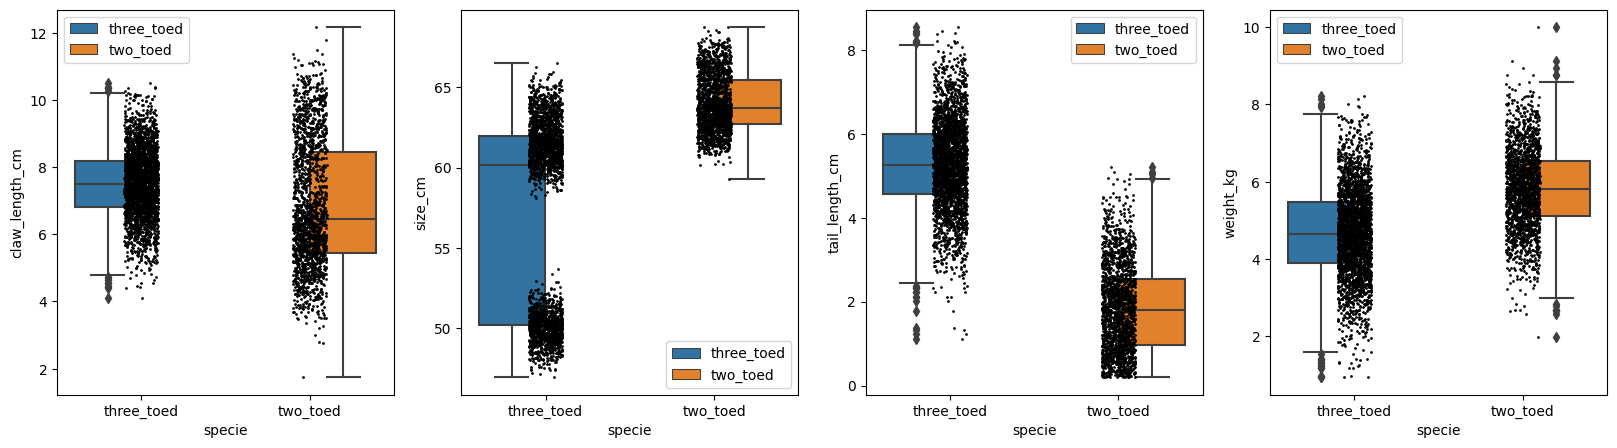

In [29]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,5))

i = 0
for names in numbercol_names:
    sns.boxplot(data=df, x='specie', y=names, ax=axs[i], hue='specie')
    sns.stripplot(data=df, x='specie', y=names, ax=axs[i], color='black', size=2)
    i+=1


<Axes: xlabel='specie', ylabel='claw_length_cm'>

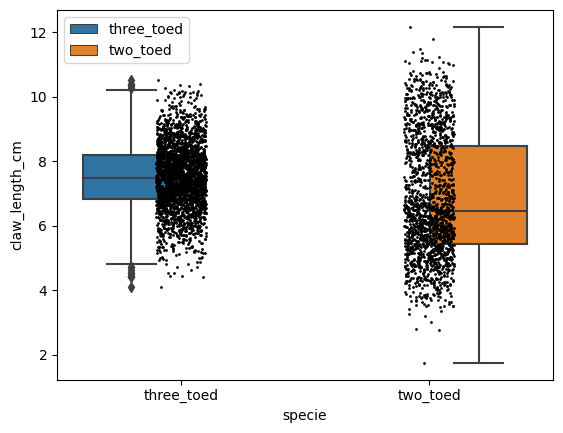

In [30]:
sns.boxplot(data = df, x = 'specie', y = 'claw_length_cm', hue = 'specie')
sns.stripplot(data = df, x = 'specie', y = 'claw_length_cm', color = 'black', size = 2)

<Axes: xlabel='specie', ylabel='claw_length_cm'>

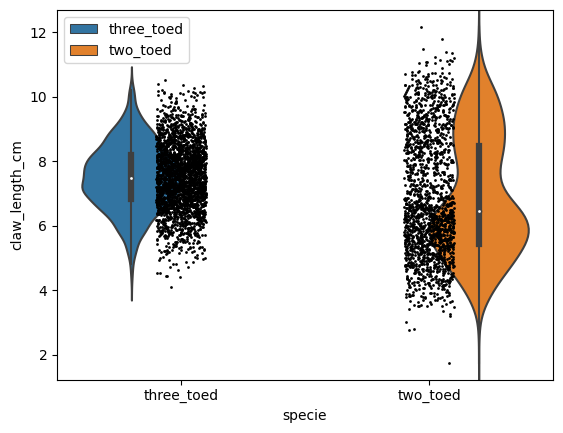

In [31]:
sns.violinplot(data = df, x = 'specie', y = 'claw_length_cm', hue = 'specie')
sns.stripplot(data = df, x = 'specie', y = 'claw_length_cm', color = 'black', size = 2)

In [32]:
#sns.swarmplot(data = df, x = 'specie', y = 'claw_length_cm', hue = 'specie')

In [33]:
correlation_columns = df.describe(include=np.number).columns
correlation = df[correlation_columns].corr()
correlation

,claw_length_cm,size_cm,tail_length_cm,weight_kg
claw_length_cm,1.000000,-0.030977,0.051270,0.037653
size_cm,-0.030977,1.000000,-0.479885,0.400918
tail_length_cm,0.051270,-0.479885,1.000000,-0.457793
weight_kg,0.037653,0.400918,-0.457793,1.000000


<Axes: >

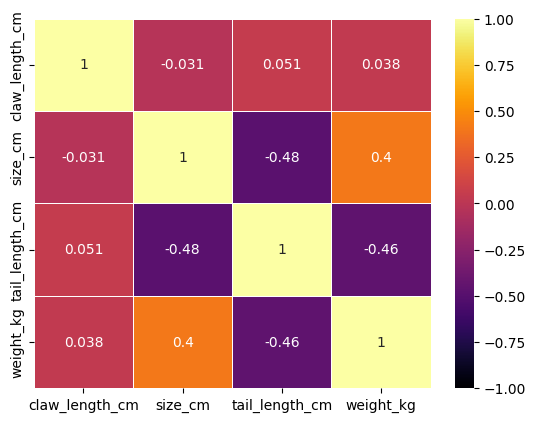

In [34]:
sns.heatmap(
    data = correlation,
    cmap = 'inferno',
    center = 0,
    vmin = -1,
    vmax = 1,
    linewidths = 0.5,
    annot = True
)

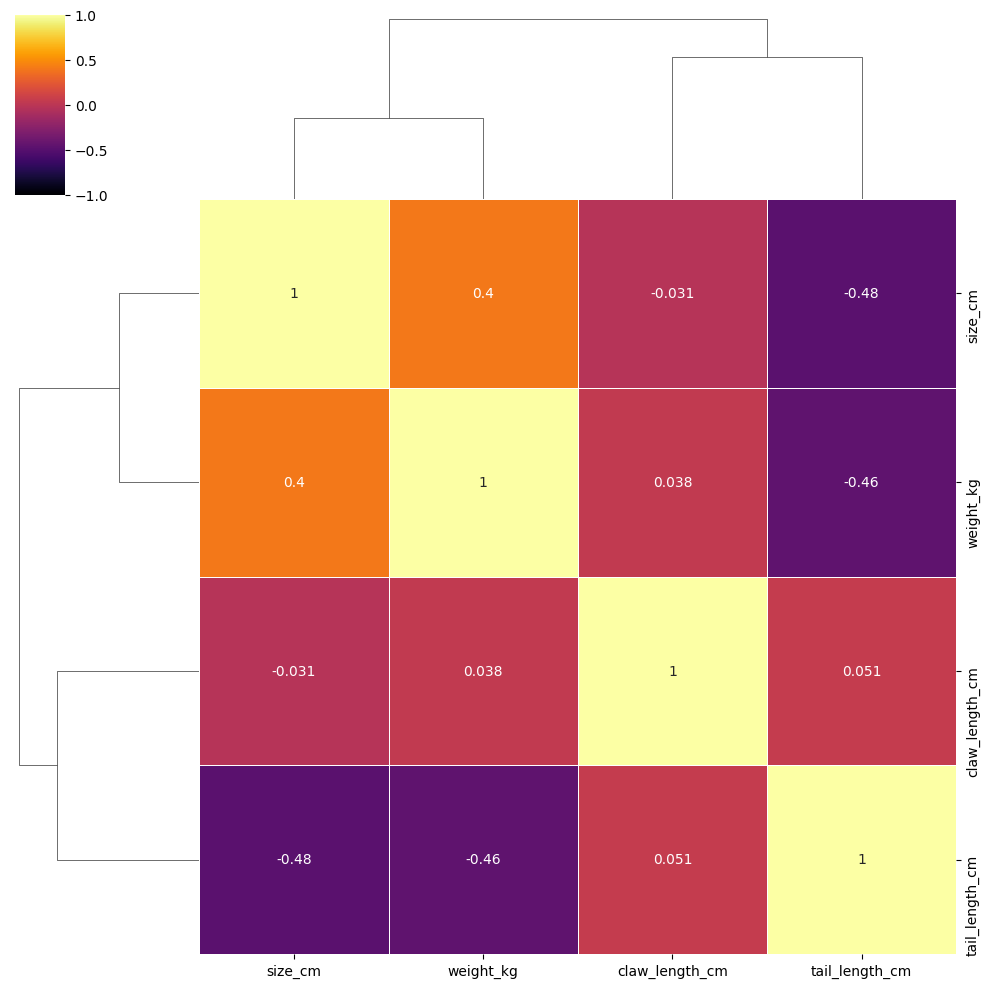

In [35]:
sns.clustermap(
    data = correlation,
    cmap = 'inferno',
    center = 0,
    vmin = -1,
    vmax = 1,
    linewidths = 0.5,
    annot = True
)

c:\Users\Janus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Janus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


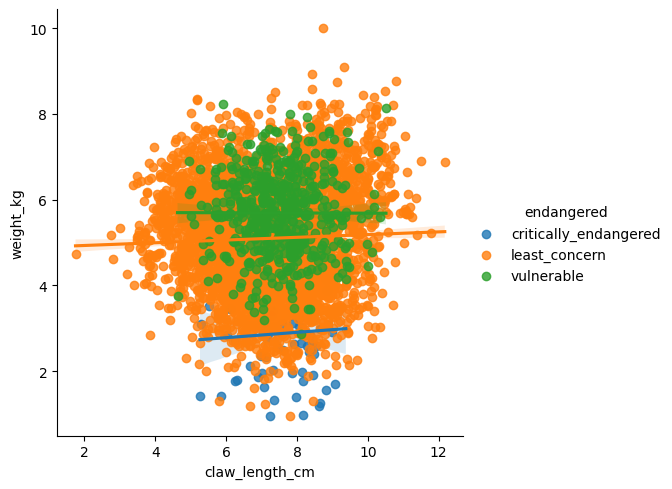

In [36]:
sns.lmplot(data = df, x = 'claw_length_cm', y = 'weight_kg', hue = 'endangered')

c:\Users\Janus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


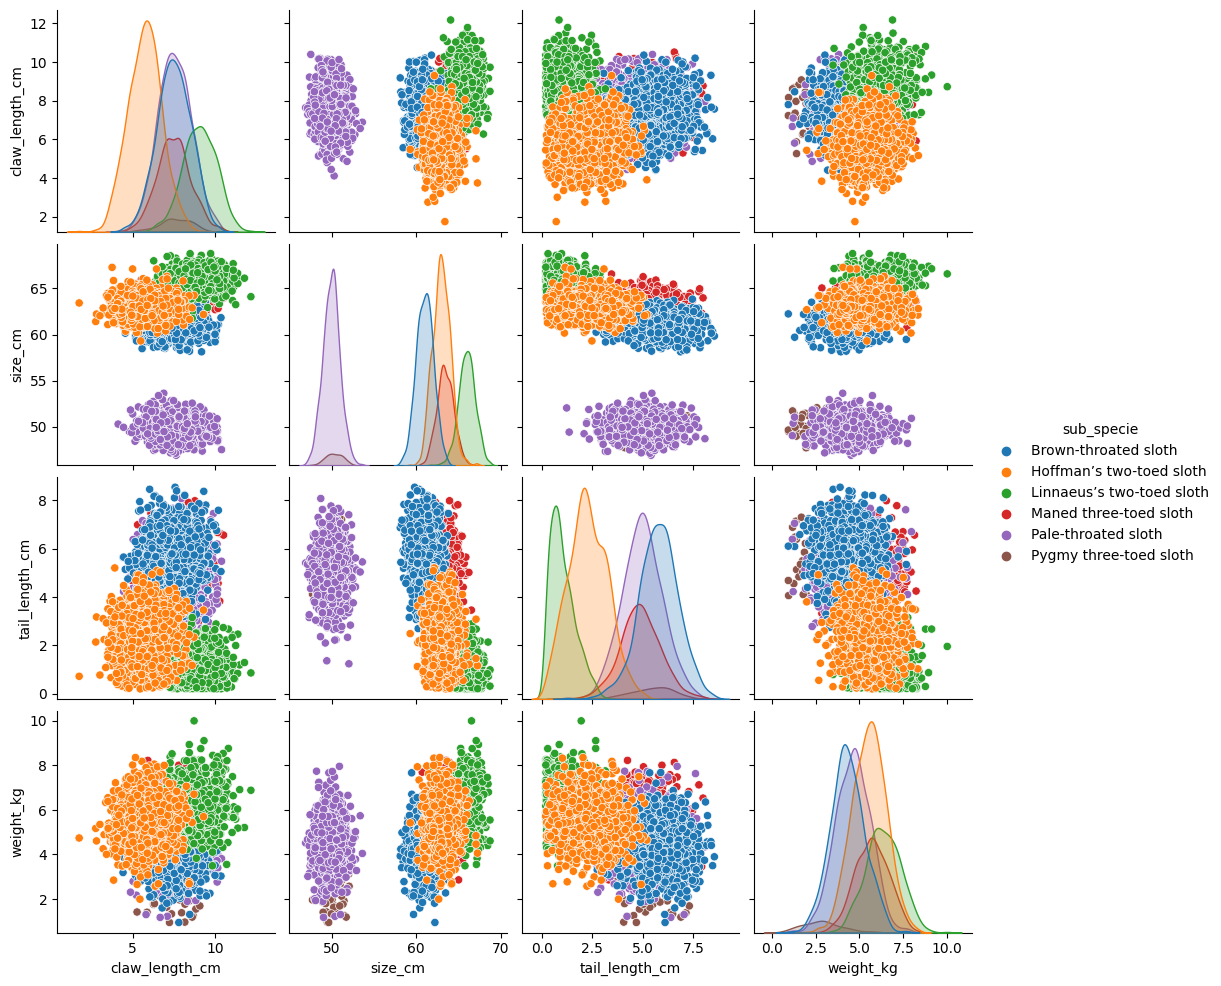

In [37]:
sns.pairplot(data =df, hue = 'sub_specie')